In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

# 1.Load data

In [5]:
insertion_statistics = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/15_insertion_level_depletion_analysis/insertions_LFC.csv", index_col=[0,1,2,3], header=[0,1])
fitting_results = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/16_insertion_level_curve_fitting/insertions_LFC_fitted.csv", index_col=[0,1,2,3])

annotations = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/13_concatenated/annotations.tsv", index_col=[0,1,2,3], sep="\t")
ingene_index = annotations.query("Type != 'Intergenic region' and Distance_to_stop_codon > 4").index


# 2.Plus strand vs Minus strand

In [8]:
plus_and_minus_results = fitting_results.unstack(level="Strand").copy()

In [12]:
def plot_plus_minus_strand_comparison(plus_and_minus_results, params=['A', 'um', 'lam', 'R2', 'RMSE', 'normalized_RMSE']):
    
    # Set up the figure with subplots for each parameter
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, param in enumerate(params):
        ax = axes[i]
        
        # Extract plus and minus strand data for current parameter
        plus_data = plus_and_minus_results[(param, '+')]
        minus_data = plus_and_minus_results[(param, '-')]
        
        # Remove NaN values
        mask = ~(np.isnan(plus_data) | np.isnan(minus_data))
        plus_clean = plus_data[mask]
        minus_clean = minus_data[mask]
        
        # Create scatter plot
        ax.scatter(plus_clean, minus_clean, alpha=0.6, s=10, facecolor='none', edgecolor='grey')
        
        # Add diagonal line for reference (y=x)
        min_val = min(plus_clean.min(), minus_clean.min())
        max_val = max(plus_clean.max(), minus_clean.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=1)
        
        # Set labels and title
        ax.set_xlabel(f'{param} (Plus strand)')
        ax.set_ylabel(f'{param} (Minus strand)')
        ax.set_title(f'{param}: Plus vs Minus strand')
        
        # Calculate correlation coefficient
        corr = np.corrcoef(plus_clean, minus_clean)[0, 1]
        ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Summary statistics for Plus vs Minus strand comparison:")
    print("=" * 60)
    for param in params:
        plus_data = plus_and_minus_results[(param, '+')]
        minus_data = plus_and_minus_results[(param, '-')]
        
        # Remove NaN values
        mask = ~(np.isnan(plus_data) | np.isnan(minus_data))
        plus_clean = plus_data[mask]
        minus_clean = minus_data[mask]
        
        if len(plus_clean) > 0:
            corr = np.corrcoef(plus_clean, minus_clean)[0, 1]
            print(f"{param:15s}: n={len(plus_clean):6d}, correlation={corr:6.3f}")
        else:
            print(f"{param:15s}: No valid data points")


## all plus-minus insertion pairs

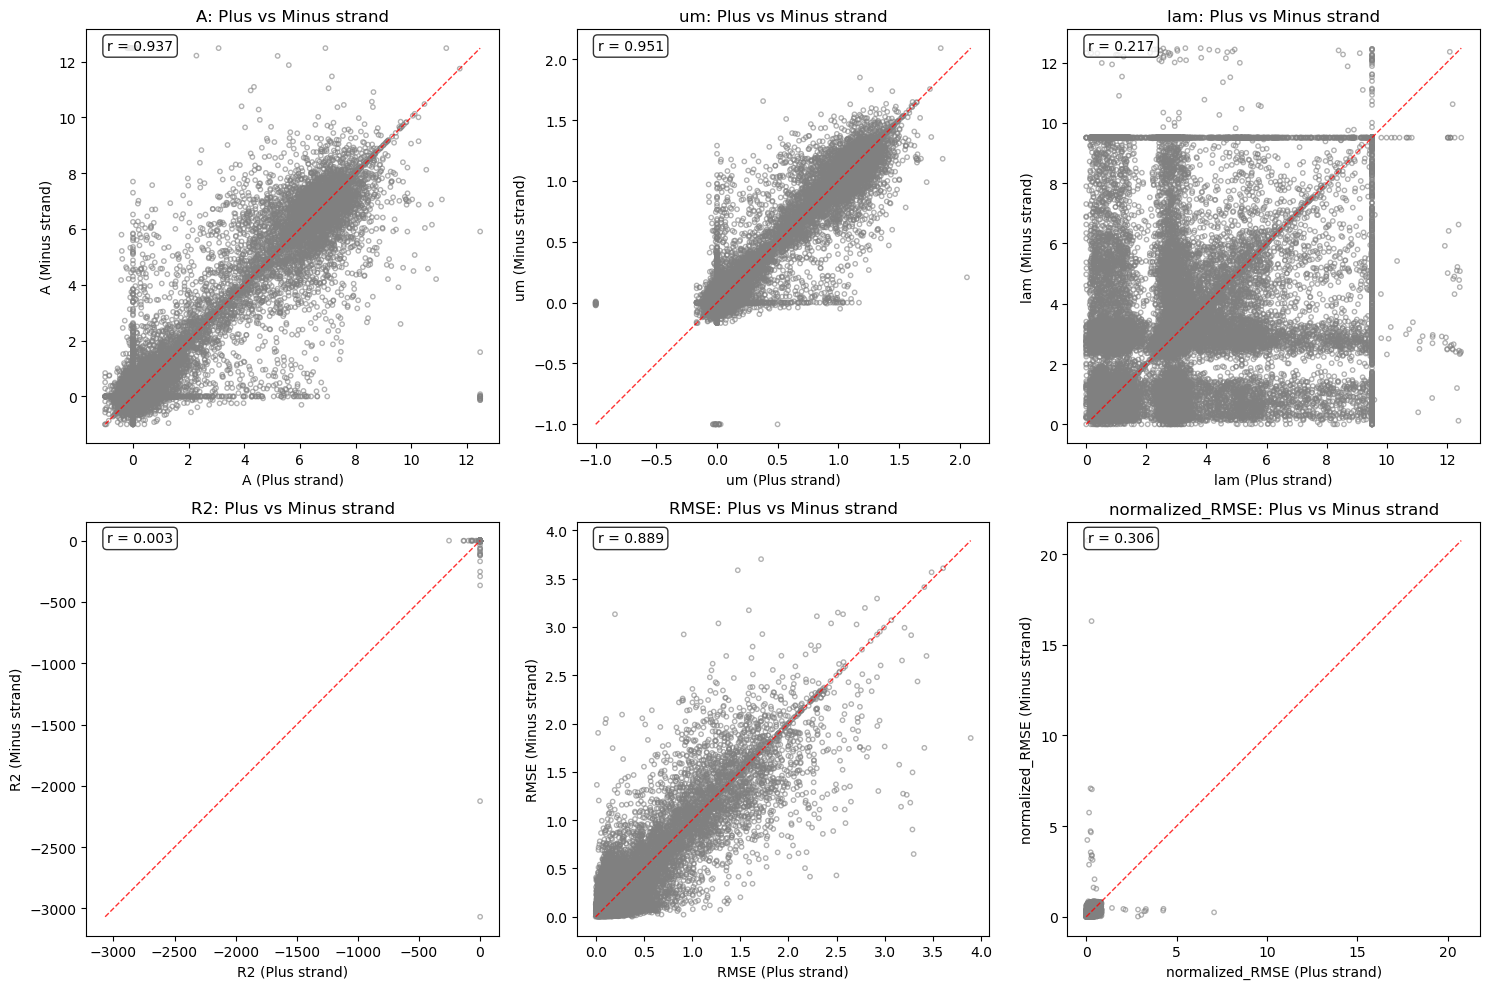

Summary statistics for Plus vs Minus strand comparison:
A              : n= 40087, correlation= 0.937
um             : n= 40087, correlation= 0.951
lam            : n= 40087, correlation= 0.217
R2             : n= 40087, correlation= 0.003
RMSE           : n= 40087, correlation= 0.889
normalized_RMSE: n= 40087, correlation= 0.306


In [13]:
plot_plus_minus_strand_comparison(plus_and_minus_results)

## in gene insertions

In [18]:
in_gene_insertion_pairs = plus_and_minus_results[plus_and_minus_results.index.isin(ingene_index.droplevel(2).unique())].copy()

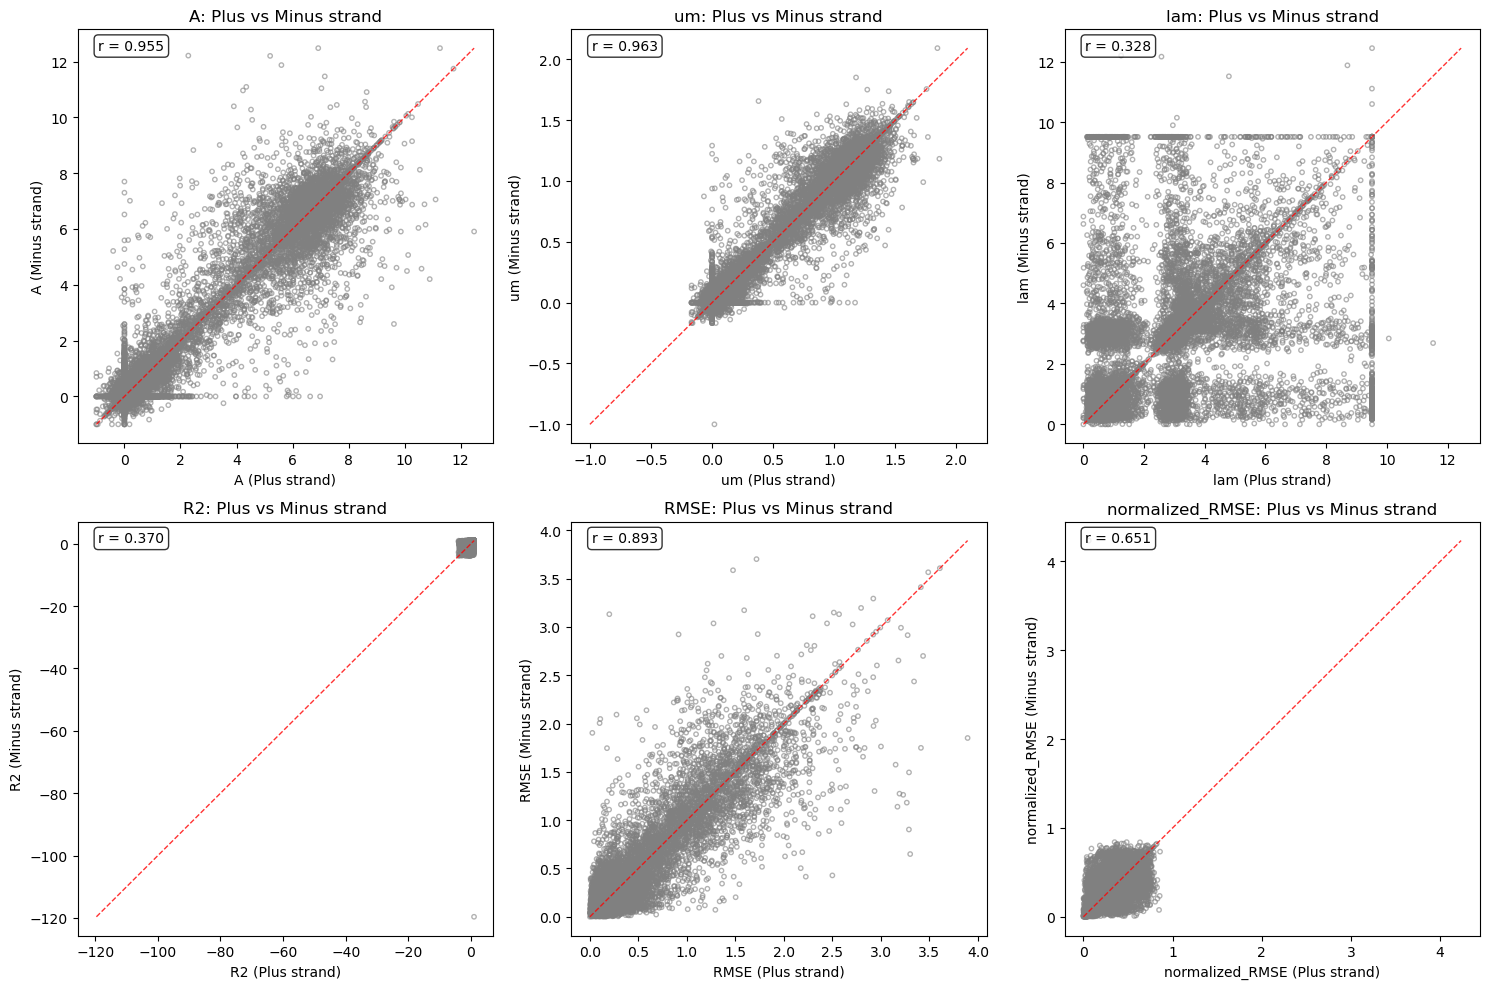

Summary statistics for Plus vs Minus strand comparison:
A              : n= 17537, correlation= 0.955
um             : n= 17537, correlation= 0.963
lam            : n= 17537, correlation= 0.328
R2             : n= 17537, correlation= 0.370
RMSE           : n= 17537, correlation= 0.893
normalized_RMSE: n= 17537, correlation= 0.651


In [19]:
plot_plus_minus_strand_comparison(in_gene_insertion_pairs)

## intergenic region

In [20]:
intergenic_region_insertion_pairs = plus_and_minus_results[~plus_and_minus_results.index.isin(ingene_index.droplevel(2).unique())].copy()

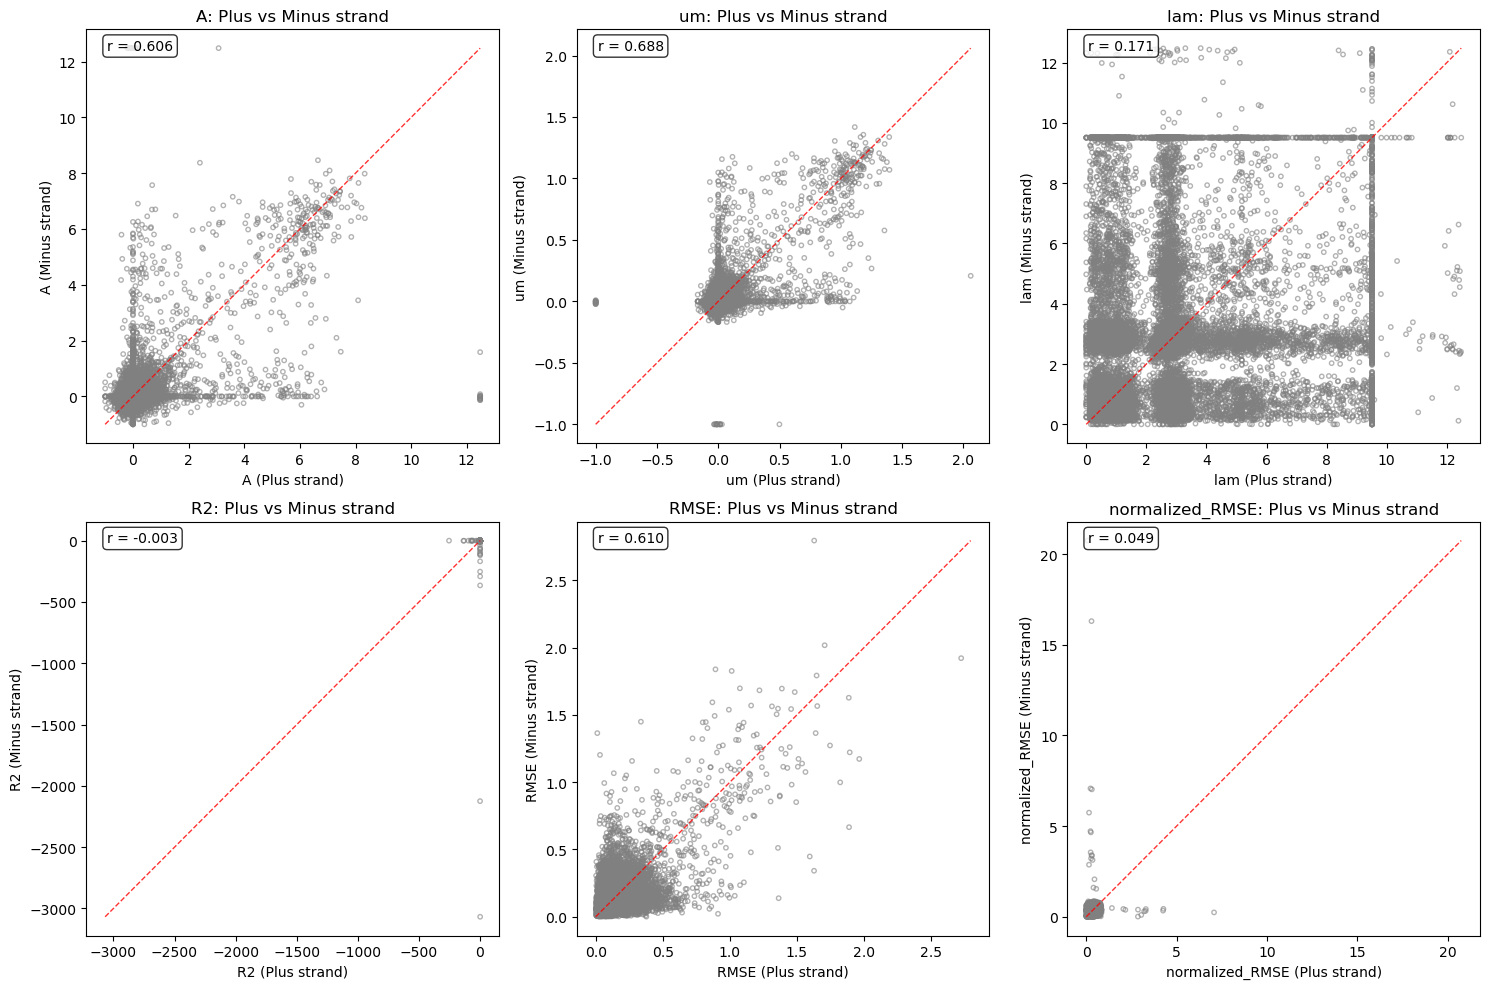

Summary statistics for Plus vs Minus strand comparison:
A              : n= 22550, correlation= 0.606
um             : n= 22550, correlation= 0.688
lam            : n= 22550, correlation= 0.171
R2             : n= 22550, correlation=-0.003
RMSE           : n= 22550, correlation= 0.610
normalized_RMSE: n= 22550, correlation= 0.049


In [22]:
plot_plus_minus_strand_comparison(intergenic_region_insertion_pairs)